 # Problem statement
 
This a model to predict the product frequently bought by customers.
 
 

In [60]:
#import numpy and pandas package
import numpy as np
import pandas as pd

#import packages for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings

#import statsmodels 
import statsmodels.formula.api as smf

#import RMSE
from statsmodels.tools.eval_measures import rmse

#import linear regression from scikit-learn
from sklearn.linear_model import LinearRegression

#config settings
%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore') ##supress warnings


# loading data into a dataframe

In [61]:
pwd

'C:\\Users\\Velda Karimi\\Documents\\Machine_Learning_A4\\predict_customer_juypter'

In [62]:
# load the data into a dataframe called prod_transactions
prod_transactions_df = pd.read_csv(r"C:\Users\Velda Karimi\Documents\Machine_Learning_A4\predict_customer_juypter\supermarket_till_transactions.csv")

In [63]:
# view the top five records
prod_transactions_df.head(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060413,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,20060412,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,20060413,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,20060412,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,20060413,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [64]:
prod_transactions_df = prod_transactions_df[["SHOP_WEEKDAY","PROD_CODE"]]
prod_transactions_df.head(5)

,SHOP_WEEKDAY,PROD_CODE
0,5,PRD0900097
1,4,PRD0900353
2,5,PRD0900550
3,4,PRD0901647
4,5,PRD0902064


In [65]:
X = prod_transactions_df["SHOP_WEEKDAY"]
y_raw = prod_transactions_df["PROD_CODE"]

In [66]:
#frequency encoding
fe = prod_transactions_df.groupby('PROD_CODE').size() / len(prod_transactions_df)
prod_transactions_df.loc[:, 'PROD_CODE_FREQ_ENC'] = prod_transactions_df['PROD_CODE'].map(fe)
prod_transactions_df.sample(5)

,SHOP_WEEKDAY,PROD_CODE,PROD_CODE_FREQ_ENC
85,4,PRD0903052,0.025210
14,6,PRD0900531,0.008403
98,4,PRD0903650,0.008403
77,3,PRD0902695,0.008403
118,6,PRD0903833,0.008403


In [67]:
y = prod_transactions_df["PROD_CODE_FREQ_ENC"]

In [68]:


# calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)



# Calculate the terms needed for the numator and denominator of beta
prod_transactions_df['xycov'] = (prod_transactions_df['SHOP_WEEKDAY'] - xmean) * (prod_transactions_df['PROD_CODE_FREQ_ENC'] - ymean)
prod_transactions_df['xvar'] = (prod_transactions_df['SHOP_WEEKDAY'] - xmean)**2


# Calculate beta and alpha
beta = prod_transactions_df['xycov'].sum() / prod_transactions_df['xvar'].sum()
alpha = ymean - (beta * xmean)

In [69]:
#view the alpha and beta values
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 0.008527863895157625
beta = 0.00040491370066446223


We have an estimate for alpha and beta.Our model can be written as ye = 0.0085 + 0.0004 X, we can now start making predictions.

In [70]:
ypred = alpha + beta * X

In [71]:
# view the predictions
ypred

0      0.010552
1      0.010148
2      0.010552
3      0.010148
4      0.010552
         ...   
114    0.009338
115    0.010957
116    0.010957
117    0.010957
118    0.010957
Name: SHOP_WEEKDAY, Length: 119, dtype: float64

Plotting our production ypred against the actual values of y to understand our model 

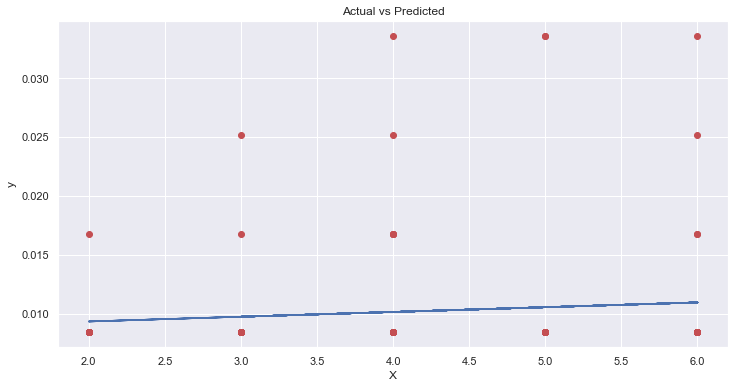

In [72]:
# plotting regression against actual data.
plt.figure(figsize=(12, 6))
plt.plot(X, ypred) #regression line
plt.plot(X, y, 'ro') #scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

#### Using statsmodels

In [73]:
#Initialise and fir linear regression model using 'statsmodels' 
stats_model = smf.ols('PROD_CODE_FREQ_ENC ~ SHOP_WEEKDAY', data= prod_transactions_df)
stats_model = stats_model.fit()

We do not need to calculate alpha and beta ourselves as the calling model.params will show us the models parameters.

In [74]:
stats_model.params

Intercept       0.008528
SHOP_WEEKDAY    0.000405
dtype: float64

 From the results above:
β0 = 0.008528 - This is the y intercept when x is zero
β1 = 0.000405 - This is the regression coefficient that measures a unit change in PROD_CODE when SHOP_WEEKDAY changes. 


In [75]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     PROD_CODE_FREQ_ENC   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.029
Date:                Mon, 02 Mar 2020   Prob (F-statistic):              0.313
Time:                        14:04:40   Log-Likelihood:                 451.60
No. Observations:                 119   AIC:                            -899.2
Df Residuals:                     117   BIC:                            -893.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0085      0.002      4.843      0.000       0.005       0.012
SHOP_WEEKDAY     0.0004      0.000      1.014      0.313      -0.000       0.001
==============================================================================
Omnibus:                      101.128   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.091
Skew:                           3.166   Prob(JB):                    2.26e-140
Kurtosis:                      12.467   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-Squared

The coefficient of determination, R-Squared -This is used to measure how much the variation in the outcome can be explained by the variation in the independent variables.
R-squared always increases as more predictors are added to the MLR model
even though predictors may not be related  to the outcome variable.

R2 by itself can't thus be used to identify which predictors should be in a model and which should not be included. R2 can only be between 0 and 1, where 0 indicates thwe outcome that cannot be predicted by any of the independent variables and 1 indicates the outcome can be predicted without error from the independent variables. 


In [76]:
#print the r-squared value for the model
stats_model.rsquared

0.008714773380182672

This means that 0.8714% of the products sold can be explained by SHOP_WEEKDAY

### Adjusted R-Squared

When we add more predictor values to the equation, R-squared will always increase making it not accurate as the number of predictor variables increases.
Adjusted R-Squared accounts for the increase of predictor variables.
Because of the nature of the equation the adjusted R-Squared should always be lower or equal to R-Squared. 

In [77]:
#print the adjusted R-Squared value for the model
stats_model.rsquared_adj

0.00024225007573985824

### Confidence in the model

A confidence interval gives an estimated range of values likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data.
A confidence interval is how much uncertainity there is with any particular statistic.
Confidence intervals are always used with a margin of error.
It tells you how confident you can be with the results if they reflect what you would expect to find if it were possible to study the entire population.


In [78]:
# print the confidence intervals for the model coefficients
stats_model.conf_int()

,0,1
Intercept,0.005040,0.012015
SHOP_WEEKDAY,-0.000386,0.001196


### Hypothesis Testing and P-Values

In [79]:
#print the p-values for the model coefficients 
stats_model.pvalues

Intercept       0.000004
SHOP_WEEKDAY    0.312582
dtype: float64

After we have fit  a simple regression model, we can try to predict the values of products based on the equation we just derived using the predict method

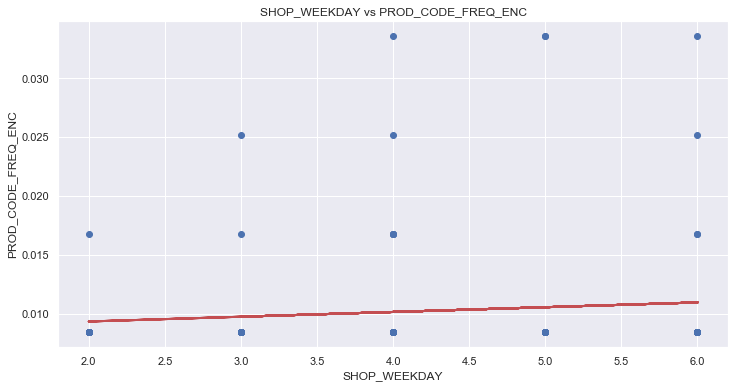

In [80]:
#predict values
prod_code_pred = stats_model.predict()

#plot regression against actual data
plt.figure(figsize=(12,6))
plt.plot(prod_transactions_df['SHOP_WEEKDAY'], prod_transactions_df['PROD_CODE_FREQ_ENC'], 'o') #scatter plot showing actual data
plt.plot (prod_transactions_df['SHOP_WEEKDAY'], prod_code_pred, 'r', linewidth=2) #regressionline
plt.xlabel('SHOP_WEEKDAY')
plt.ylabel('PROD_CODE_FREQ_ENC')
plt.title('SHOP_WEEKDAY vs PROD_CODE_FREQ_ENC')

plt.show()

In [81]:
new_X = 1
ypred = stats_model.predict({"SHOP_WEEKDAY": new_X })

### RMSE

The root-mean-square error is frequently used to measure the differences between values (sample and population values) predicted by a model and the values actually observed.
The smaller the value the better.

In [82]:
#calc rmse
rmse = rmse(y, ypred)
rmse

0.005618498062537327